
# 🧠 Task 3 – Level 3: Sentiment Classification using TF-IDF & Logistic Regression (with Stemming)

This notebook fulfills the requirements of Task 3 – Level 3 by:

- Preprocessing text (tokenization, stopword removal, stemming)
- Converting text into numerical representation using **TF-IDF**
- Training a classification model using **Logistic Regression**
- Evaluating model performance using **Precision**, **Recall**, and **F1-score**

> 🔧 Uses **PorterStemmer** instead of lemmatization to avoid external dependencies like WordNet.


## 📚 Import Libraries

In [34]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import wordpunct_tokenize
import string
import re

nltk.data.path.append("/Users/lpn/nltk_data")  # Garante que o caminho do NLTK esteja correto
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /Users/lpn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/lpn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 📥 Load and Inspect Dataset

In [35]:

df = pd.read_csv("Sentiment_dataset.csv")
df.columns = df.columns.str.strip()
df["Sentiment"] = df["Sentiment"].str.strip().str.lower()
df = df[["Text", "Sentiment"]].dropna()
df.head()


,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,positive
1,Traffic was terrible this morning. ...,negative
2,Just finished an amazing workout! 💪 ...,positive
3,Excited about the upcoming weekend getaway! ...,positive
4,Trying out a new recipe for dinner tonight. ...,neutral


## 🎯 Encode Sentiment Labels

In [36]:

label_map = {'positive': 2, 'neutral': 1, 'negative': 0}
df["label"] = df["Sentiment"].map(label_map)
df["label"].value_counts()


label
2.0    45
1.0    18
0.0     4
Name: count, dtype: int64

## 🧼 Text Preprocessing (with Stemming)

In [37]:
# Inicializa o stemmer e a lista de stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Função de pré-processamento
def preprocess(text):
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+|www\S+", "", text)  # remove links
    text = re.sub(r"[^a-zA-Z ]", "", text)  # remove pontuação e números
    tokens = wordpunct_tokenize(text)  # tokenização sem dependência do punkt
    tokens = [
        stemmer.stem(w) 
        for w in tokens 
        if w not in stop_words and w not in string.punctuation
    ]
    return " ".join(tokens)

# Aplica o pré-processamento à coluna de texto
df["clean_text"] = df["Text"].apply(preprocess)

# Visualiza o resultado
df[["Text", "clean_text"]].head()


,Text,clean_text
0,Enjoying a beautiful day at the park! ...,enjoy beauti day park
1,Traffic was terrible this morning. ...,traffic terribl morn
2,Just finished an amazing workout! 💪 ...,finish amaz workout
3,Excited about the upcoming weekend getaway! ...,excit upcom weekend getaway
4,Trying out a new recipe for dinner tonight. ...,tri new recip dinner tonight


## 🔠 Convert Text to TF-IDF Features

In [38]:

tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df["clean_text"])
y = df["label"]


## 🧪 Train-Test Split

In [39]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# 📌 Verificação e tratamento de valores ausentes

def remove_nan_from_sparse(X, y):
    X_df = pd.DataFrame(X.toarray())
    y_df = pd.Series(y).reset_index(drop=True)
    combined = pd.concat([X_df, y_df], axis=1)
    combined = combined.dropna()
    return combined.iloc[:, :-1].values, combined.iloc[:, -1].values

X_train, y_train = remove_nan_from_sparse(X_train, y_train)
X_test, y_test = remove_nan_from_sparse(X_test, y_test)

## 🤖 Train Logistic Regression Classifier

In [41]:
# Treinamento
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predição
y_pred = model.predict(X_test)


In [42]:

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

## 📊 Model Evaluation

In [43]:
# Avaliação
labels = unique_labels(y_test, y_pred)
label_to_name = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
target_names = [label_to_name[label] for label in labels]

print(classification_report(y_test, y_pred, labels=labels, target_names=target_names))


              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00         1
    Positive       0.90      1.00      0.95         9

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

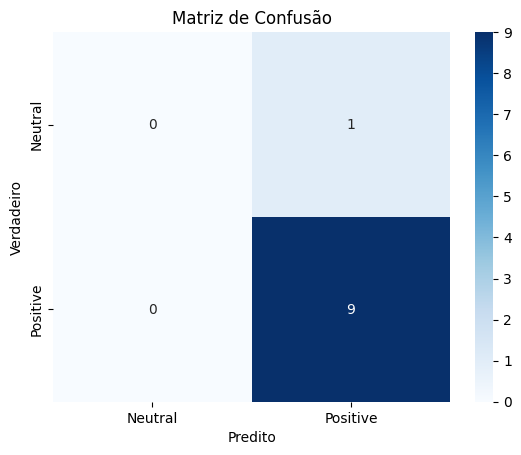

In [44]:

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()